In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from IPython.core.display import HTML
css=open('style-table.css').read()+open('style-notebook.css').read() 
HTML('<style>()</style>.format(css)')

In [4]:
titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [5]:
cast = pd.read_csv('cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# What are the ten most common movie names of all time?


In [44]:
title_counts = titles['title'].value_counts()
top_ten_common_titles=title_counts.head(10)
print(top_ten_common_titles)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Freedom                 11
Honeymoon               11
Othello                 11
The Three Musketeers    11
Name: title, dtype: int64


# Which three years of the 1930s saw the most films released?


In [48]:
films_1930s = titles[(cast['year'] >= 1930) & (cast['year'] <= 1939)]
most_films_1930s = films_1930s['year'].value_counts()
top_three_years=most_films_1930s.head(3)
print(top_three_years)

2017    678
2016    544
2015    485
Name: year, dtype: int64


C:\Users\achut\AppData\Local\Temp\ipykernel_21656\1057350776.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  films_1930s = titles[(cast['year'] >= 1930) & (cast['year'] <= 1939)]


# Plot the number of films that have been released each decade over the history of cinema.


<Axes: title={'center': 'Number of Films Released Each Decade'}, xlabel='Decade', ylabel='Number of Films'>

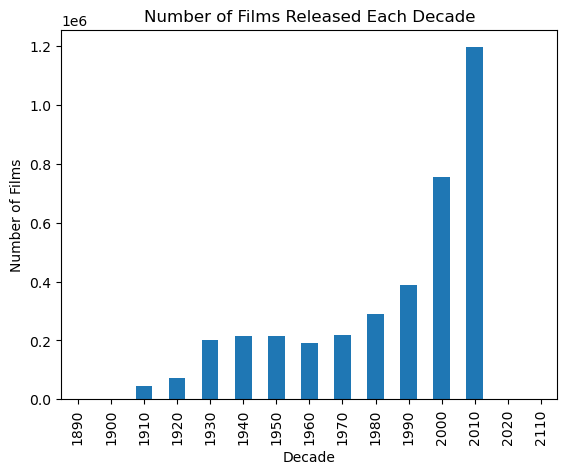

In [10]:
films_by_decade = cast['year'] // 10 * 10  # Calculate the decade
films_by_decade = films_by_decade.value_counts().sort_index()
films_by_decade.plot(kind='bar', xlabel='Decade', ylabel='Number of Films', title='Number of Films Released Each Decade')

# Plot the number of "Hamlet" films made each decade.


<Axes: title={'center': 'Number of "Hamlet" Films Made Each Decade'}, xlabel='Decade', ylabel='Number of "Hamlet" Films'>

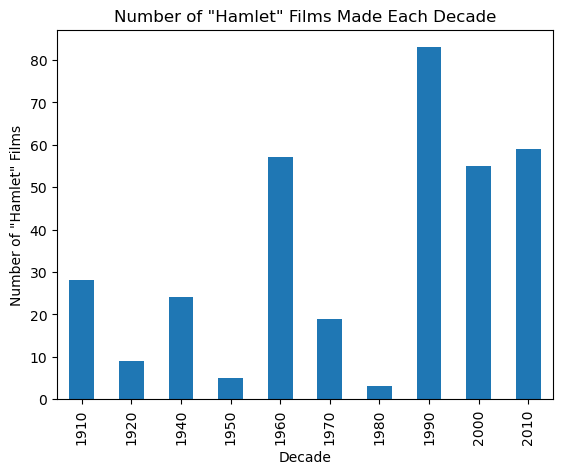

In [11]:
hamlet_films = cast[cast['title'] == 'Hamlet']
hamlet_films_by_decade = hamlet_films['year'] // 10 * 10
hamlet_films_by_decade = hamlet_films_by_decade.value_counts().sort_index()
hamlet_films_by_decade.plot(kind='bar', xlabel='Decade', ylabel='Number of "Hamlet" Films', title='Number of "Hamlet" Films Made Each Decade')


# Plot the number of "Rustler" characters in each decade of the history of film.

<Axes: title={'center': 'Number of "Rustler" Characters in Each Decade'}, xlabel='Decade', ylabel='Number of "Rustler" Characters'>

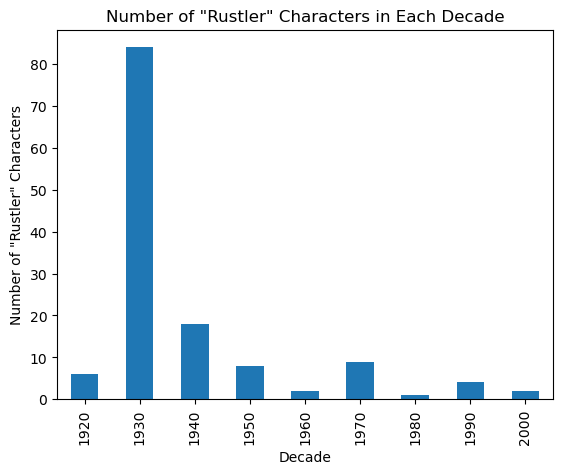

In [12]:
rustler_characters = cast[cast['character'] == 'Rustler']
rustler_characters_by_decade = rustler_characters['year'] // 10 * 10
rustler_characters_by_decade = rustler_characters_by_decade.value_counts().sort_index()
rustler_characters_by_decade.plot(kind='bar', xlabel='Decade', ylabel='Number of "Rustler" Characters', title='Number of "Rustler" Characters in Each Decade')

# Plot the number of "Hamlet" characters each decade.



<Axes: title={'center': 'Number of "Hamlet" Characters Each Decade'}, xlabel='Decade', ylabel='Number of "Hamlet" Characters'>

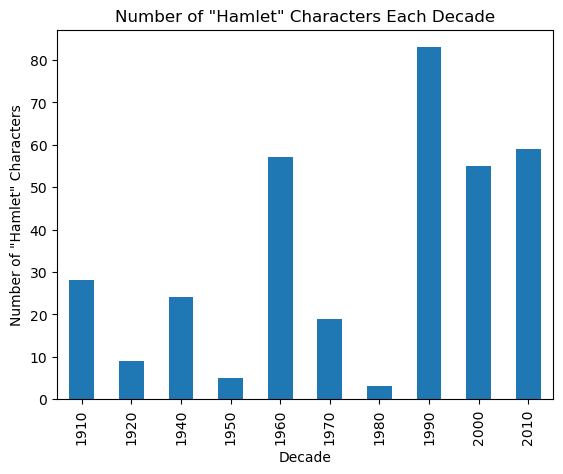

In [13]:
hamlet_characters = hamlet_films.groupby(hamlet_films['year'] // 10 * 10)['character'].count()
hamlet_characters.plot(kind='bar', xlabel='Decade', ylabel='Number of "Hamlet" Characters', title='Number of "Hamlet" Characters Each Decade')

# What are the 11 most common character names in movie history?


In [14]:
common_character_names = cast['character'].value_counts().head(11)
common_character_names

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

# Who are the 10 people most often credited as "Herself" in film history?


In [49]:
herself_credits = cast[cast['character'] == 'Herself']
top_herself_actresses = herself_credits['name'].value_counts()
top_herself_actresses_10=top_herself_actresses.head(10)
print(top_herself_actresses_10)

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64


# Which actors or actresses appeared in the most movies in the year 1945?


In [17]:
most_movies_1945 = cast[cast['year'] == 1945]
top_actors_1945 = most_movies_1945['name'].value_counts()
top_actors_1945

Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
                   ..
Pablo Mu?iz         1
Luis Mussot         1
Mike Musso          1
Bill Mussetter      1
Ricky Ricardi       1
Name: name, Length: 7824, dtype: int64

# Which actors or actresses appeared in the most movies in the year 1987?



In [18]:
most_movies_1987 = cast[cast['year'] == 1987]
top_actors_1987 = most_movies_1987['name'].value_counts()
top_actors_1987

Shakti Kapoor        16
Yun-Fat Chow         14
Vikas Anand          12
Fui-On Shing         12
Amrish Puri          12
                     ..
Armando Lodigiani     1
Michael Locsin        1
Gary Lockwood         1
Rod Lockman           1
?lk? ?lker            1
Name: name, Length: 28213, dtype: int64

# Plot how many roles Mammootty has played in each year of his career.
 

<Axes: title={'center': 'Mammootty Roles per Year'}, xlabel='Year', ylabel='Number of Roles'>

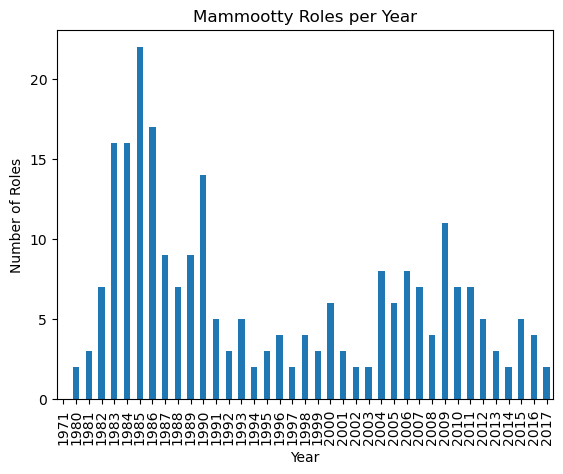

In [19]:
mammootty_roles = cast[cast['name'] == 'Mammootty']
mammootty_roles_by_year = mammootty_roles.groupby('year')['n'].count()
mammootty_roles_by_year.plot(kind='bar', xlabel='Year', ylabel='Number of Roles', title='Mammootty Roles per Year')


# What are the 10 most frequent roles that start with the phrase "Patron in"?


In [20]:
patron_roles = cast[cast['character'].str.startswith('Patron in')]
top_patron_roles = patron_roles['character'].value_counts().head(10)
top_patron_roles

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in booth                  2
Name: character, dtype: int64

# What are the 10 most frequent roles that start with the word "Science"?
 

In [21]:
science_roles = cast[cast['character'].str.startswith('Science')]
top_science_roles = science_roles['character'].value_counts().head(10)
top_science_roles

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science Club Member      5
Science Promo Cadet      5
Science                  4
Name: character, dtype: int64

# Plot the n-values of the roles that Judi Dench has played over her career

<Axes: title={'center': 'Judi Dench Roles (n-value) over Time'}, xlabel='Year', ylabel='Average n-value'>

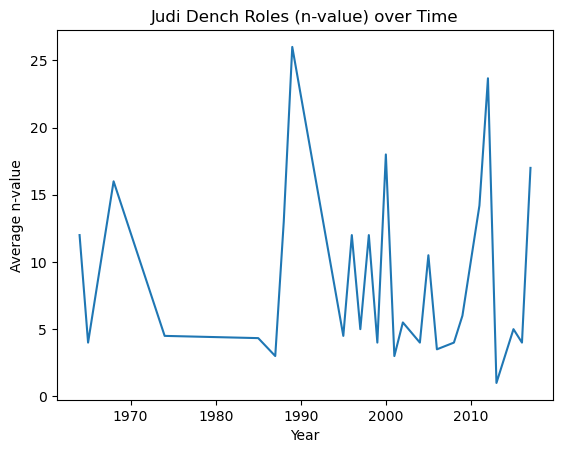

In [22]:
judi_dench_roles = cast[cast['name'] == 'Judi Dench']
judi_dench_roles_n = judi_dench_roles.groupby('year')['n'].mean()
judi_dench_roles_n.plot(kind='line', xlabel='Year', ylabel='Average n-value', title='Judi Dench Roles (n-value) over Time')

# Plot the n-values of Cary Grant's roles through his career.


<Axes: title={'center': 'Cary Grant Roles (n-value) over Time'}, xlabel='Year', ylabel='Average n-value'>

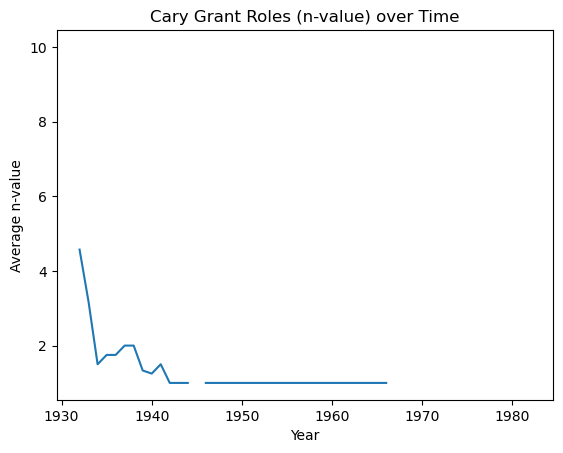

In [23]:
cary_grant_roles = cast[cast['name'] == 'Cary Grant']
cary_grant_roles_n = cary_grant_roles.groupby('year')['n'].mean()
cary_grant_roles_n.plot(kind='line', xlabel='Year', ylabel='Average n-value', title='Cary Grant Roles (n-value) over Time')

# Plot the n-value of the roles that Sidney Poitier has acted over the years.


<Axes: title={'center': 'Sidney Poitier Roles (n-value) over Time'}, xlabel='Year', ylabel='Average n-value'>

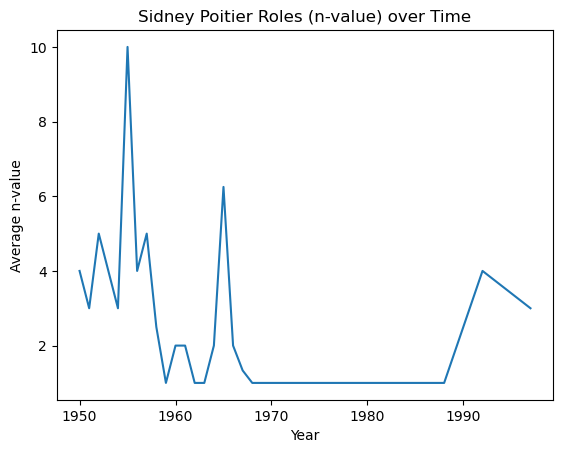

In [25]:
sidney_poitier_roles = cast[cast['name'] == 'Sidney Poitier']
sidney_poitier_roles_n = sidney_poitier_roles.groupby('year')['n'].mean()
sidney_poitier_roles_n.plot(kind='line', xlabel='Year', ylabel='Average n-value', title='Sidney Poitier Roles (n-value) over Time')

# How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?


In [39]:
leading_roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959) & (cast['n'] == 1)]
leading_roles_actors_1950s = leading_roles_1950s[leading_roles_1950s['type'] == 'actor']['n'].count()
leading_roles_actresses_1950s = leading_roles_1950s[leading_roles_1950s['type'] == 'actress']['n'].count()
print(f"leading_roles_actors_1950s: {leading_roles_actors_1950s}\nleading_roles_actresses_1950s: {leading_roles_actresses_1950s}")

leading_roles_actors_1950s: 6692
leading_roles_actresses_1950s: 3040


# How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [38]:
supporting_roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959) & (cast['n'] == 2)]
supporting_roles_actors_1950s = supporting_roles_1950s[supporting_roles_1950s['type'] == 'actor']['n'].count()
supporting_roles_actresses_1950s = supporting_roles_1950s[supporting_roles_1950s['type'] == 'actress']['n'].count()
print(f"supporting_roles_actors_1950s: {supporting_roles_actors_1950s}\nsupporting_roles_actresses_1950s: {supporting_roles_actresses_1950s}")

supporting_roles_actors_1950s: 4640
supporting_roles_actresses_1950s: 4635
